# Data Cleaning
In this notebook we present our research about our data.  
There are two types of cells:
1. A cell that presents research and insights about the data information.
2. A cell that changes the `df` according to the specific insight.

First of all, import these packages and load the csv that we created in crawling chapter.

In [1]:
import re
import pandas as pd

# language detector
from langdetect import detect
from langdetect import detect_langs

# Wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../crawling/merged_csv.csv")

### Remove Unnecessary Columns

In [3]:
print(df.shape)
df.head()

(28331, 5)


Unnamed: 0  Unnamed: 0.1  category  \
0           0             0  business   
1           1             1  business   
2           2             2  business   
3           3             3  business   
4           4             4  business   

                                              header  \
0  Why CEOs and Company Executives Are Focused on...   
1                 What did I do differently in 2021?   
2           Transition from QA Engineer to Developer   
3  The President of Indonesia Got Annoyed Because...   
4  Magento Problems Owners of Online Shop Face in...   

                                             content  
0  CEOs and company executives are having trouble...  
1  I love what I do, so I will take any amount of...  
2  My personal experience of changing position fr...  
3  The president of Indonesia got angry. As the l...  
4  Just imagine you have an online shop and in 20...

In the `df` above we have two unnecessary columns:
* Unnamed: 0
* Unnamed: 0.1
Let's drop these two columns.

In [4]:
# Romove df columns
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df.drop(columns="Unnamed: 0.1", axis=1, inplace=True)

In [5]:
df

category                                             header  \
0      business  Why CEOs and Company Executives Are Focused on...   
1      business                 What did I do differently in 2021?   
2      business           Transition from QA Engineer to Developer   
3      business  The President of Indonesia Got Annoyed Because...   
4      business  Magento Problems Owners of Online Shop Face in...   
...         ...                                                ...   
28326   weather  Colorado Avalanches Bury Cars, Roadways; Backc...   
28327   weather  Alabama Gov. Kay Ivey Views EF4 Tornado Damage...   
28328   weather  Alabama Tornado Victims: Funerals Begin for th...   
28329   weather  NASA Captures First Images of Intersecting Sho...   
28330   weather  Louisville Zoo Closed Another Day by Giant Sin...   

                                                 content  
0      CEOs and company executives are having trouble...  
1      I love what I do, so I will take any amount of...  
2      My personal experience of changing position fr...  
3      The president of Indonesia got angry. As the l...  
4      Just imagine you have an online shop and in 20...  
...                                                  ...  
28326  Avalanches closed highways and buried cars thi...  
28327  The Alabama town of Beauregard continues to re...  
28328  Four children are among the 23 people who died...  
28329  Using advanced photographic technology, NASA h...  
28330  The sinkhole, almost the size of a football fi...  

[28331 rows x 3 columns]

### Remove null Objects

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28331 entries, 0 to 28330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  28331 non-null  object
 1   header    28331 non-null  object
 2   content   23636 non-null  object
dtypes: object(3)
memory usage: 664.1+ KB


In [7]:
df[df['content'].isna()]

category                                             header content
11     business  More Than 70% of People Have Imposter Syndrome...     NaN
13     business  4 investments that may be profitable in the fu...     NaN
21     business                    How To Flip a Coin Successfully     NaN
24     business   Ecommerce Website Design Tips and Best Practices     NaN
34     business  What to Consider When Starting a Road Contract...     NaN
...         ...                                                ...     ...
27801   weather       20 Killed by Hurricane Dorian in the Bahamas     NaN
27811   weather             Hurricane Dorian Death Toll Rises to 5     NaN
27828   weather  Lightning Strike Injures Six People at Golf To...     NaN
28105   weather  Powerful 8.0 Magnitude Earthquake Strikes Nort...     NaN
28272   weather  Afghanistan Flooding Kills at Least 32, Offici...     NaN

[4695 rows x 3 columns]

The two cell above showed us that we have `null` objects in content column.  
As a result we need to drop these `null` objects.

In [8]:
# Remove null objects
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23636 entries, 0 to 28330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  23636 non-null  object
 1   header    23636 non-null  object
 2   content   23636 non-null  object
dtypes: object(3)
memory usage: 738.6+ KB


### Remove Duplicate Rows

In [9]:
df[df.duplicated() == True]

category                                             header  \
555    business  Why CEOs and Company Executives Are Focused on...   
556    business                 What did I do differently in 2021?   
557    business           Transition from QA Engineer to Developer   
558    business  The President of Indonesia Got Annoyed Because...   
559    business  Magento Problems Owners of Online Shop Face in...   
...         ...                                                ...   
27788   weather  In the Bahamas, Official Hurricane Dorian Deat...   
27794   weather  Aid Begins to Reach Bahamas Islands Devastated...   
27902   weather  Wildfires Rage in Oregon, Washington; 9 Firefi...   
27917   weather  The Weather Channel Receives Two Emmy Nominations   
28237   weather  Winter Storm Wesley Impacts: Schools Closed, F...   

                                                 content  
555    CEOs and company executives are having trouble...  
556    I love what I do, so I will take any amount of...  
557    My personal experience of changing position fr...  
558    The president of Indonesia got angry. As the l...  
559    Just imagine you have an online shop and in 20...  
...                                                  ...  
27788  Here is the latest information on search and r...  
27794  Here is the latest information on search and r...  
27902  Wildfires are threatening homes in Washington ...  
27917  Here are the awards for which The Weather Chan...  
28237  The spring storm began its assault Wednesday, ...  

[10851 rows x 3 columns]

The cell above showed us that we have duplicate rows in our dataframe.  
As a result we need to prune these rows.

In [10]:
# Prune duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12785 entries, 0 to 28330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  12785 non-null  object
 1   header    12785 non-null  object
 2   content   12785 non-null  object
dtypes: object(3)
memory usage: 399.5+ KB


### WordCloud Visualization

In [11]:
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    print(f"Number of words: {len(words.split())}")
    cleaned_word = ' '.join([word for word in words.split()])        
    wordcloud = WordCloud(background_color = color,
                          width = 2500, 
                          height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


entertainment:
Number of words: 79821


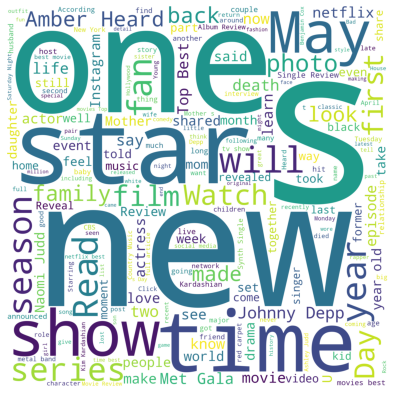

sports:
Number of words: 80957


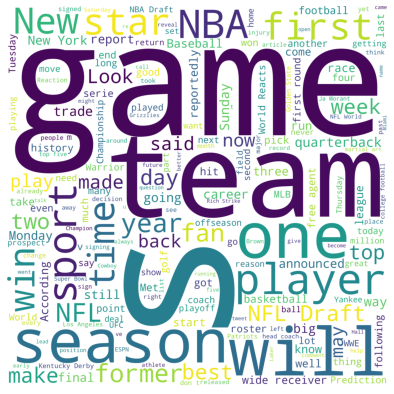

technology:
Number of words: 91940


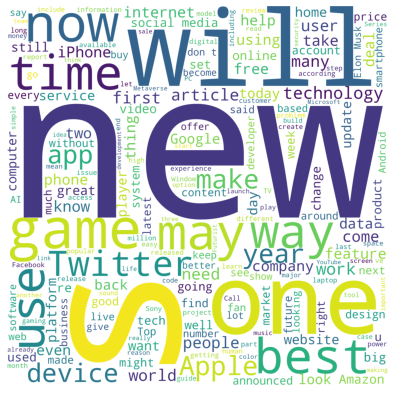

food:
Number of words: 32111


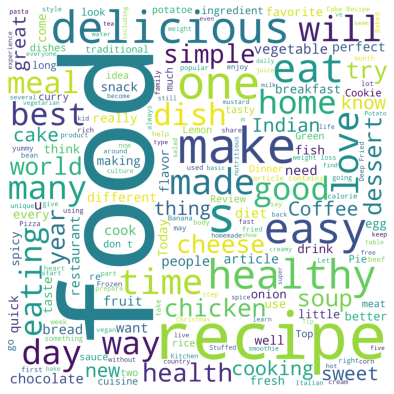

science:
Number of words: 64973


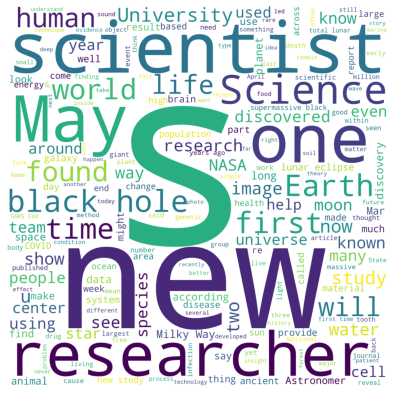

politics:
Number of words: 82958


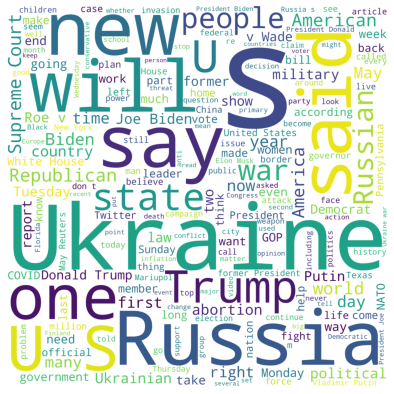

business:
Number of words: 83118


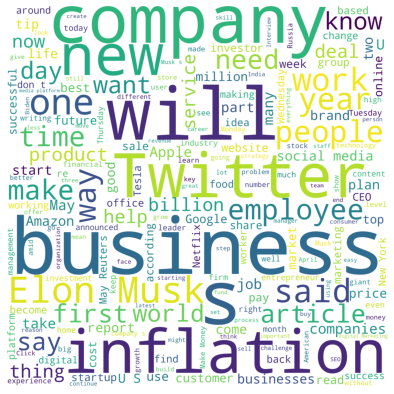

weather:
Number of words: 26436


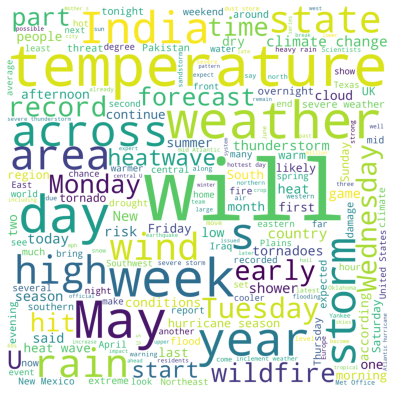

In [12]:
## Vizualization word cloud
category_series_words = {}

for category in set(df["category"]):
    category_words = df[df["category"] == category]["header"] + " " + df[df["category"] == category]["content"]        
    category_series_words[category] = category_words        

for category, series_words in category_series_words.items():
    print(f"{category}:")
    wordcloud_draw(series_words, 'white')
    

### Remove Article with Short Content

In [11]:
#drop < 5 words
df = df[df["content"].str.split().str.len().gt(5)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12652 entries, 0 to 28330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  12652 non-null  object
 1   header    12652 non-null  object
 2   content   12652 non-null  object
dtypes: object(3)
memory usage: 395.4+ KB


### Remove Number \n and \r from Content and Header Columns
Add Benford Rule ???

In [12]:
# Remove numbers and \n \r - 
def remove_numbers_and_backslashes(column_name):
    for i, row in df.iterrows():    
        row[f"{column_name}"] = re.sub(r'\d','', row[f"{column_name}"])
        row[f"{column_name}"] = row[f"{column_name}"].replace("\n"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\r"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\t"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("-"," ")


remove_numbers_and_backslashes("header")
remove_numbers_and_backslashes("content")

### Remove non-english Articles

In [13]:
def remove_non_english_articles(df):
    for i, row in df.iterrows():
        try:
            # if en in detect_langs continue
            content_language = detect(row["content"])
            if (row["category"] != "food") and (content_language != "en"):
                print("--------------------------------------")
                print(f"!!! Detect content as {content_language} language.\nDrop row form df:\n{row}")
                print(detect_langs(row["content"]))
                print("--------------------------------------")
                print()
                df.drop(i, inplace=True)

        except Exception as error:
            print(f"Drop row form df:\n {row}")
            df.drop(i, inplace=True)    

In [14]:
print(f"before: {df.shape}")
remove_non_english_articles(df)
print(f"after: {df.shape}")

before: (12652, 3)
--------------------------------------
!!! Detect content as fr language.
Drop row form df:
category                                    entertainment
header      Strange Sexual Preferences of Gundam Villains
content        At some point, Gundam villains are creeps.
Name: 2704, dtype: object
[fr:0.714283819224855, en:0.28571512812169786]
--------------------------------------

--------------------------------------
!!! Detect content as da language.
Drop row form df:
category                                        entertainment
header        Uplifting Funeral Songs for Older Generation ()
content     funeral songs for older generation  modern fun...
Name: 3031, dtype: object
[da:0.9999948714202714]
--------------------------------------

--------------------------------------
!!! Detect content as et language.
Drop row form df:
category                                        entertainment
header              Top  Japanese Anime Series of All Time ()
content     japane

--------------------------------------
!!! Detect content as af language.
Drop row form df:
category                                        entertainment
header               Top  Best Werewolf Movies Of All Time ()
content     werewolf movies list werewolf movies  fantasy ...
Name: 3678, dtype: object
[en:0.7142832327185707, af:0.28571650052323677]
--------------------------------------

--------------------------------------
!!! Detect content as af language.
Drop row form df:
category                                        entertainment
header                   Top  Best German Movies Ever Made ()
content     german movies on netflix german movies list be...
Name: 3684, dtype: object
[af:0.999993362652632]
--------------------------------------

--------------------------------------
!!! Detect content as fr language.
Drop row form df:
category                                        entertainment
header                    Top  Best Dance Movies Ever Made ()
content     dance movies 

[ru:0.9999964916269601]
--------------------------------------

--------------------------------------
!!! Detect content as tr language.
Drop row form df:
category                                           technology
header      Hissettiğin Kapanı Kim Çiziyor? Pozitiflerin D...
content     Zor bir toplantıda olduğumda, hayatımdaki tek ...
Name: 19579, dtype: object
[tr:0.9999977878240893]
--------------------------------------

--------------------------------------
!!! Detect content as pt language.
Drop row form df:
category                                           technology
header                             As Engrenagens da Inovação
content     Os fatores que geram a inovação, segundo a Ges...
Name: 19670, dtype: object
[pt:0.9999972649068053]
--------------------------------------

--------------------------------------
!!! Detect content as pt language.
Drop row form df:
category                                           technology
header      O que uma pessoa Quality Assuran

### Merge Text Columns 

In [15]:
df["merged_text"] = df["header"] + " " + df["content"]
df.drop(columns="header", axis=1, inplace=True)
df.drop(columns="content", axis=1, inplace=True)
df  

category                                        merged_text
0      business  Why CEOs and Company Executives Are Focused on...
1      business  What did I do differently in ? I love what I d...
2      business  Transition from QA Engineer to Developer My pe...
3      business  The President of Indonesia Got Annoyed Because...
4      business  Magento Problems Owners of Online Shop Face in...
...         ...                                                ...
28326   weather  Colorado Avalanches Bury Cars, Roadways; Backc...
28327   weather  Alabama Gov. Kay Ivey Views EF Tornado Damage:...
28328   weather  Alabama Tornado Victims: Funerals Begin for th...
28329   weather  NASA Captures First Images of Intersecting Sho...
28330   weather  Louisville Zoo Closed Another Day by Giant Sin...

[12596 rows x 2 columns]

### Remove Special Characters

In [16]:
def remove_special_chars(text):
    pattern = r'[^A-Za-z0-9\s]+'
    return re.sub(pattern, '', text)

df['merged_text'] = df['merged_text'].apply(remove_special_chars)


### Dataframe Lowercase

In [20]:
def convert_lower(text):
    return text.lower()

df['merged_text'] = df['merged_text'].apply(convert_lower)
df

category                                        merged_text
100    politics  mary trump slams susan sarandon as a moron for...
101    politics  moment two ukrainian fighter jets bomb russian...
102    politics  mark esper on whats at stake if donald trump i...
103    politics  hunter biden enlists hollywood mega lawyer for...
104    politics  president trumps response to mark espers  minu...
...         ...                                                ...
21170      food  classic tater tot casserole with green beans t...
21171      food  stews of south india know about different stew...
21172      food  biscuits from self rising flour biscuits are a...
21173      food  streusel topping for banana bread for example ...
21174      food   fresh summer drinks that refresh you if you a...

[9068 rows x 2 columns]

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
    
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
    

def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_text.append(word)
        else:       
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    lemmatized_text = " ".join(lemmatized_text)
    
    return lemmatized_text

print(df)
df['merged_text'] = df['merged_text'].apply(lemmatize_word)
print(df)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\efi13\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


       category                                        merged_text
0      business  Why CEOs and Company Executives Are Focused on...
1      business  What did I do differently in  I love what I do...
2      business  Transition from QA Engineer to Developer My pe...
3      business  The President of Indonesia Got Annoyed Because...
4      business  Magento Problems Owners of Online Shop Face in...
...         ...                                                ...
28326   weather  Colorado Avalanches Bury Cars Roadways Backcou...
28327   weather  Alabama Gov Kay Ivey Views EF Tornado Damage I...
28328   weather  Alabama Tornado Victims Funerals Begin for the...
28329   weather  NASA Captures First Images of Intersecting Sho...
28330   weather  Louisville Zoo Closed Another Day by Giant Sin...

[12596 rows x 2 columns]
       category                                        merged_text
0      business  Why CEOs and Company Executives Are Focused on...
1      business  What do I do differ

### Remove Stopwords
In WordCloud Visualization section we saw that we have common words like one and new.
Except the regulat stop words we will remove these words too.

In [22]:
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words('english') + ["one", "new", "say", "may", "get", "make", "use"]
df['merged_text'] = df['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeyjuchenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


category                                        merged_text
100    politics  mary trump slam susan sarandon moron suggest p...
101    politics  moment two ukrainian fighter jet bomb russian ...
102    politics  mark esper whats stake donald trump elect pres...
103    politics  hunter biden enlists hollywood mega lawyer cou...
104    politics  president trump response mark espers minute in...
...         ...                                                ...
21170      food  classic tater tot casserole green bean favorit...
21171      food  stew south india know different stew present s...
21172      food  biscuit self rise flour biscuit learning exper...
21173      food  streusel top banana bread example banana bread...
21174      food  fresh summer drink refresh look colorful fresh...

[9068 rows x 2 columns]

### WordsCloud Visualization Vol.2

entertainment:
Number of words: 47244


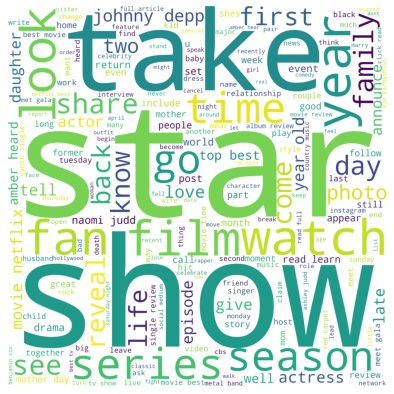

sports:
Number of words: 46990


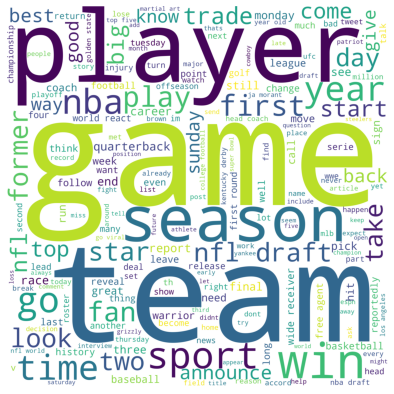

technology:
Number of words: 51048


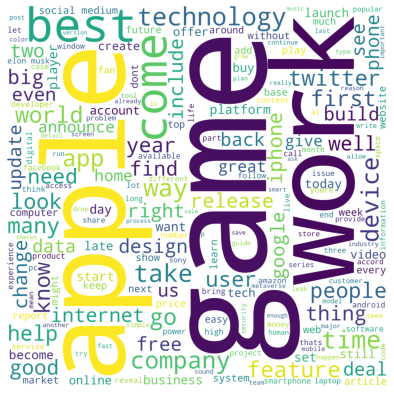

food:
Number of words: 17950


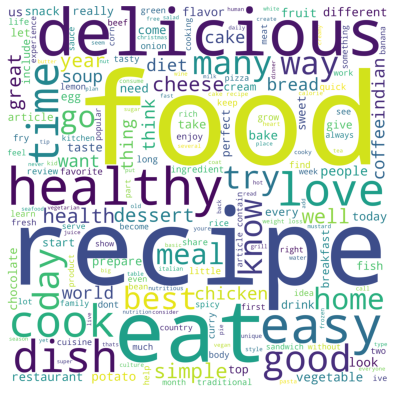

science:
Number of words: 37680


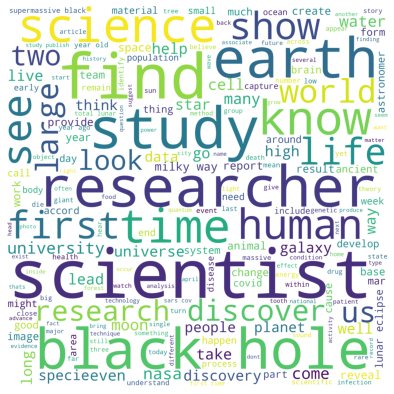

politics:
Number of words: 48784


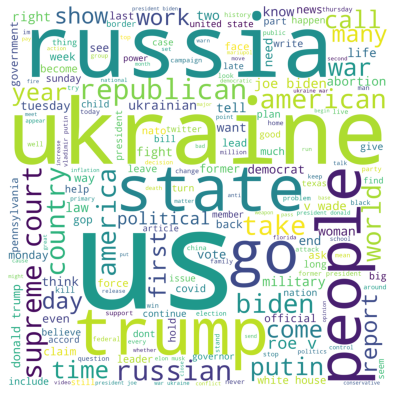

business:
Number of words: 47230


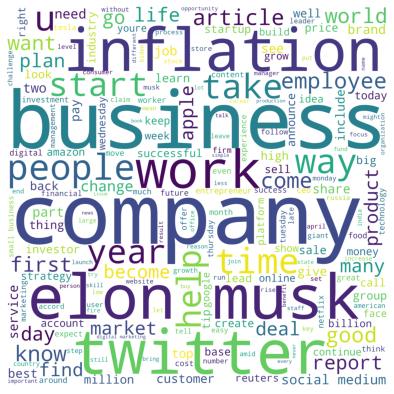

weather:
Number of words: 15591


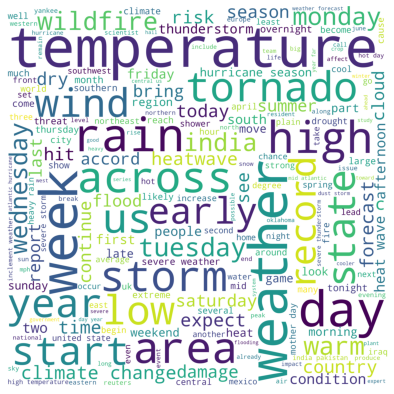

In [23]:
## Vizualization word cloud
category_series_words = {}

for category in set(df["category"]):
    category_words = df[df["category"] == category]["merged_text"]
    category_series_words[category] = category_words

for category, series_words in category_series_words.items():
    print(f"{category}:")
    wordcloud_draw(series_words, 'white')

### Full Dataframe Result

In [24]:
pd.set_option('display.max_rows', None)
df

category                                        merged_text
100         politics  mary trump slam susan sarandon moron suggest p...
101         politics  moment two ukrainian fighter jet bomb russian ...
102         politics  mark esper whats stake donald trump elect pres...
103         politics  hunter biden enlists hollywood mega lawyer cou...
104         politics  president trump response mark espers minute in...
105         politics  national gun surrender launch national gun sur...
106         politics  transcript house speaker nancy pelosi face nat...
107         politics  mississippi gov empathetic towards lady find d...
108         politics  manchin hed pas part bidens agenda democrat wr...
109         politics  russias space agency chief claim nation could ...
110         politics  ukraine launch successful counteroffensive kha...
111         politics  david gergen state democracy cant continue pat...
112         politics  former supreme court clerk leak draft roe deci...
113         politics  critic erupt clarence thomas tell americans de...
114         politics  trump indictment jan merit give learn holder f...
115         politics  mexico president country exclude americas summ...
116         politics  small drone give ukraine unprecedented edge sn...
117         politics  biden target gop inflation price skyrocket pre...
118         politics  lonely life teruo nakamura world war ii soldie...
119         politics  ukraine troop retreat popasna luhansk governor...
120         politics  trump lawyer ask void contempt ruling amid mou...
121         politics  human remain find drought stricken lake mead h...
122         politics  mitch mcconnell federal lawmaker could ban abo...
123         politics  trump defy rally goer boo turn back mehmet oz ...
124         politics  migrant worker flip script photovoice tell sto...
125         politics  lockheed martin look nearly double javelin mis...
126         politics  biden administration brace putin victory day s...
127         politics  trump coup kingpin rake big buck stymie jan in...
128         politics  gop gov defend law force incest victim carry p...
129         politics  putin double offensive russias flag army cant ...
130         politics  dem senator spar fox news host florida law chr...
131         politics  world elite special force special force highly...
132         politics  white house sound alarm covid wave fall winter...
133         politics  transcript house speaker nancy pelosi face nat...
134         politics  military tell purge extremist jan go black mus...
135         politics  former gop strategist steve schmidt slam sarah...
136         politics  bannon trash fox news wimp murphy maga bash un...
137         politics  human remain find lake mead amid historic low ...
138         politics  judge limit info alleged hillary clinton joint...
139         politics  pelosi urge us congress approve billion aid uk...
140         politics  ukraine russia need know right reuters people ...
141         politics  democrat chance beat gop control congress poll...
142         politics  republican double reverse abortion right offer...
143         politics  stimulus check update state consider payment s...
144         politics  john mccain appal embarrass meghan mccains tan...
145         politics  gasoline price drop biden take step idea unlea...
146         politics  sen johnson rip mayorkas lax border security a...
147         politics  judge spare clinton camp sussmann rule decisio...
148         politics  biden want sell infrastructure problem buyer w...
149         politics  kamala harris woman lose right decision body s...
150         politics  surrender land defeat strong ukraine emerges r...
151         politics  pope francis blame victim russia ukraine war p...
152         politics  intelligence trumps hand prone manipulation re...
153         politics  cbs polling abortion politics issue cbs pollin...
154         politics  mississippi gov refuse whether

In [ ]:
df.to_csv('clean_csv.csv')